# GTFSUtils Quickstart

## Table of Contents

- Load a GTFS file
- Visualize routes
- Visualize shapes
- Visualize stops
- Spatial filter by trip shapes (within)
- Spatial filter by trip shapes (intersects)
- Spatial filter by stop locations
- Filter by agency
- Save filtered GTFS file

# Load a GTFS file

We use the GTFS of Vienna as an example:

- Open Data Austria - [Wiener Linien – Fahrplandaten GTFS Wien](https://www.data.gv.at/katalog/dataset/ab4a73b6-1c2d-42e1-b4d9-049e04889cf0)

In [1]:
%%bash
mkdir -p data
if [ ! -f "data/vienna.gtfs.zip" ]; then
  wget http://www.wienerlinien.at/ogd_realtime/doku/ogd/gtfs/gtfs.zip \
    -qO data/vienna.gtfs.zip
fi

In [2]:
import shapely.geometry
import geopandas as gpd
import matplotlib.pyplot as plt

import gtfsutils
import gtfsutils.filter
import gtfsutils.routes

print(f"gtfsutils {gtfsutils.__version__}")

gtfsutils 0.0.5


In [3]:
%%time
bounds = [16.398134, 48.1352198, 16.5775132, 48.2935324]
gdf_bounds = gpd.GeoSeries(
    shapely.geometry.box(*bounds),
    crs='EPSG:4326').boundary

filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 3.14 s, sys: 359 ms, total: 3.5 s
Wall time: 3.5 s


In [4]:
# Show available dataframes
df_dict.keys()

dict_keys(['stops', 'stop_times', 'calendar', 'calendar_dates', 'shapes', 'routes', 'trips', 'agency'])

In [5]:
gtfsutils.print_info(df_dict)


GTFS files:
  agency.txt                      2 rows
  calendar.txt                  186 rows
  calendar_dates.txt          9,575 rows
  routes.txt                    441 rows
  shapes.txt                401,371 rows
  stop_times.txt          3,733,781 rows
  stops.txt                   4,510 rows
  trips.txt                 201,042 rows

Calender date range:
  11.12.2022 - 09.12.2023

Bounding box:
  [16.1977025532707, 47.9995020902886, 16.5494019702052, 48.3011051975429]



# Visualize routes

In [6]:
%%time
gdf_routes = gtfsutils.routes.load_routes_counts(df_dict)

CPU times: user 553 ms, sys: 196 µs, total: 553 ms
Wall time: 552 ms


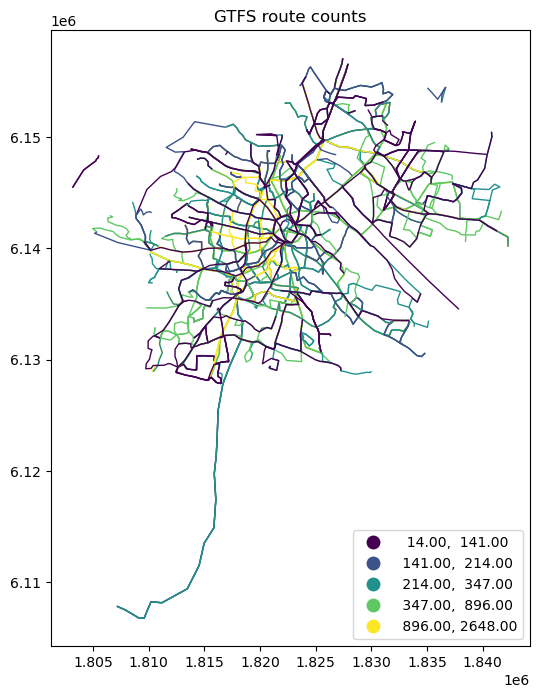

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf_plot = gdf_routes.to_crs(epsg=3857)
gdf_plot.plot(
    ax=ax, linewidth=1, alpha=1, 
    column='counts', cmap='viridis', scheme='quantiles', 
    legend=True, legend_kwds={'loc': 'lower right'})
ax.set_title("GTFS route counts");

# Visualize shapes

In [8]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 1.9 s, sys: 7.74 ms, total: 1.91 s
Wall time: 1.9 s


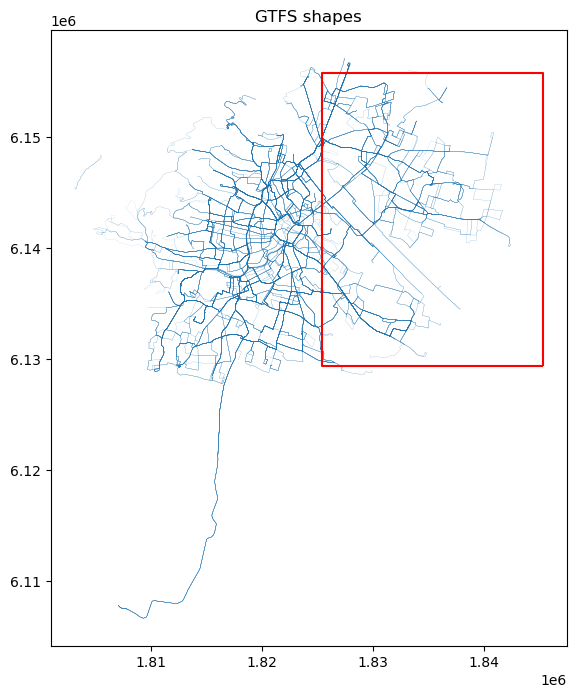

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS shapes");

# Visualize stops

In [10]:
%%time
gdf = gtfsutils.load_stops(df_dict)

CPU times: user 8.49 ms, sys: 85 µs, total: 8.58 ms
Wall time: 7.2 ms


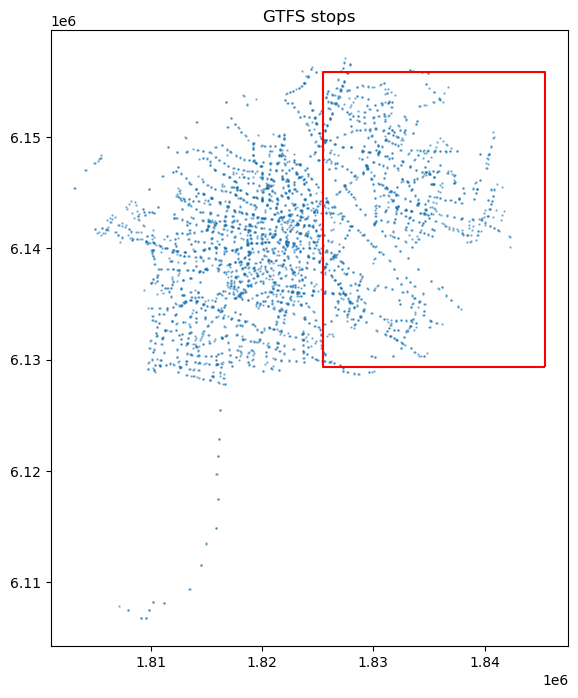

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, markersize=0.5, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS stops");

# Spatial filter by trip shapes (within)

In [12]:
%%time
gtfsutils.filter.spatial_filter_by_shapes(
    df_dict, bounds, operation='within')

CPU times: user 2.19 s, sys: 11.5 ms, total: 2.21 s
Wall time: 2.2 s


In [13]:
%%time
gdf_shapes = gtfsutils.load_shapes(df_dict)
gdf_stops = gtfsutils.load_stops(df_dict)

CPU times: user 394 ms, sys: 261 µs, total: 394 ms
Wall time: 392 ms


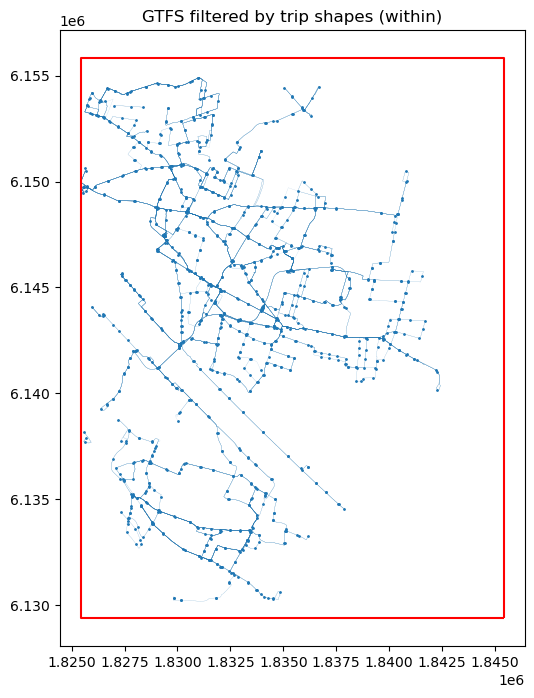

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf_shapes.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_stops.to_crs(epsg=3857).plot(ax=ax, markersize = 1)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS filtered by trip shapes (within)");

# Spatial filter by trip shapes (intersects)

In [15]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 3.51 s, sys: 479 ms, total: 3.99 s
Wall time: 3.99 s


In [16]:
%%time
gtfsutils.filter.spatial_filter_by_shapes(
    df_dict, bounds, operation='intersects')

CPU times: user 2.07 s, sys: 3.91 ms, total: 2.08 s
Wall time: 2.07 s


In [17]:
%%time
gdf_shapes = gtfsutils.load_shapes(df_dict)
gdf_stops = gtfsutils.load_stops(df_dict)

CPU times: user 693 ms, sys: 24 µs, total: 693 ms
Wall time: 691 ms


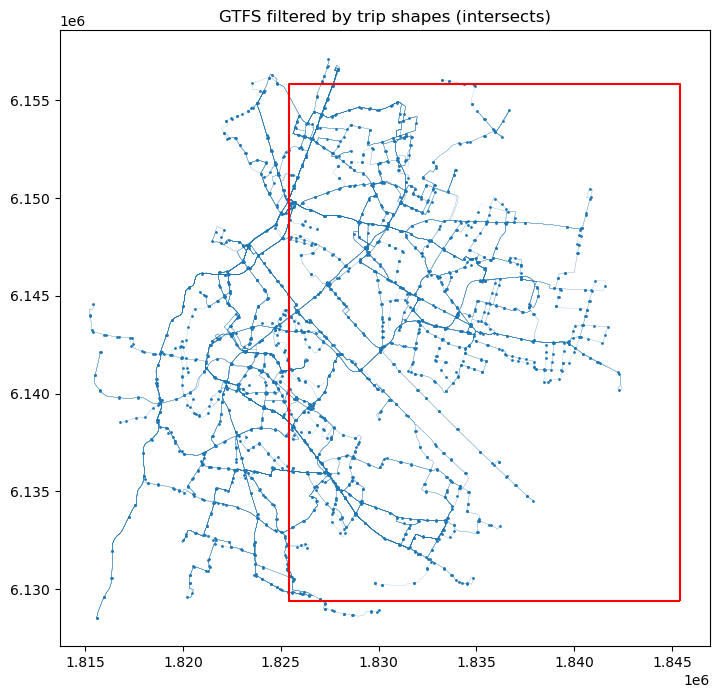

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf_shapes.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_stops.to_crs(epsg=3857).plot(ax=ax, markersize = 1)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS filtered by trip shapes (intersects)");

# Spatial filter by stop locations

In [19]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 3.35 s, sys: 432 ms, total: 3.78 s
Wall time: 3.78 s


In [20]:
%%time
gtfsutils.filter.spatial_filter_by_stops(
    df_dict, bounds)

CPU times: user 479 ms, sys: 8.05 ms, total: 487 ms
Wall time: 484 ms


In [21]:
%%time
gdf_shapes = gtfsutils.load_shapes(df_dict)
gdf_stops = gtfsutils.load_stops(df_dict)

CPU times: user 864 ms, sys: 3.94 ms, total: 868 ms
Wall time: 866 ms


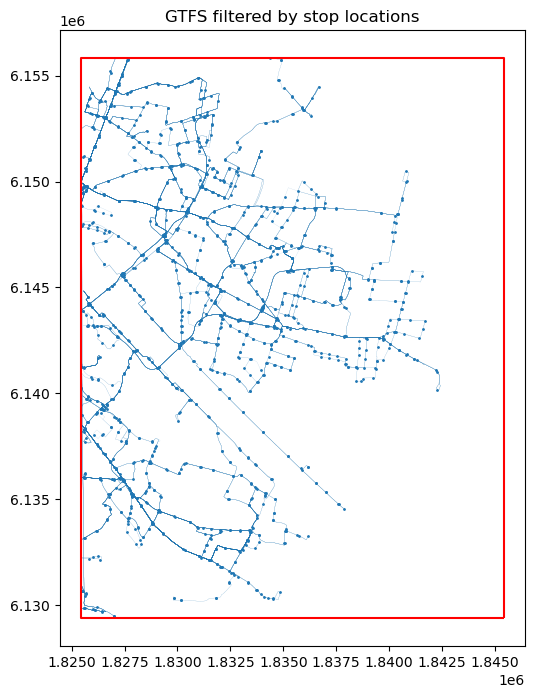

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf_shapes.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_stops.to_crs(epsg=3857).plot(ax=ax, markersize = 1)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS filtered by stop locations");

# Filter by agency

In [23]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 3.24 s, sys: 344 ms, total: 3.58 s
Wall time: 3.58 s


In [24]:
df_dict['agency']

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,3,WLB,https://www.wlb.at/,Europe/Vienna,DE,+43 (0) 1/ 90 444
1,4,Wiener Linien,https://www.wienerlinien.at/,Europe/Vienna,DE,+43 (0)1 7909 - 0


In [25]:
%%time
gtfsutils.filter.filter_by_agency_ids(df_dict, [4])

CPU times: user 444 ms, sys: 44 ms, total: 488 ms
Wall time: 487 ms


In [26]:
%%time
gdf_shapes = gtfsutils.load_shapes(df_dict)
gdf_stops = gtfsutils.load_stops(df_dict)

CPU times: user 1.69 s, sys: 3.59 ms, total: 1.69 s
Wall time: 1.69 s


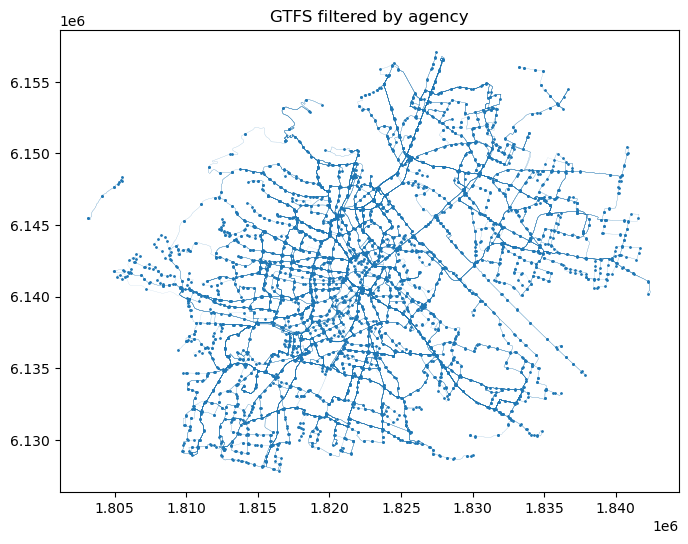

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

gdf_shapes.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_stops.to_crs(epsg=3857).plot(ax=ax, markersize = 1)
ax.set_title("GTFS filtered by agency");

# Save filtered GTFS file

In [28]:
%%time
filepath = "data/vienna-filtered.gtfs.zip"
gtfsutils.save_gtfs(df_dict, filepath, ignore_required=True, overwrite=True)

CPU times: user 12.2 s, sys: 717 ms, total: 12.9 s
Wall time: 14 s
